<a href="https://colab.research.google.com/github/yafiarkan/Unbalanced-Dataset-Bank-Chunners/blob/main/Bank_Chunners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have two classes, Existing Costumer and Attrited Customer. But the dataset is imbalanced and some dtype is object. How can we build a good prediction system?

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/BankChurners.csv',index_col='CLIENTNUM')

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


We have to delete/drop two last columns because it's a naive bayes data. And we can't validate the data.

In [ ]:
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

Here, there are some columns that have object data file. Let's do some treats.

In [ ]:
idx_obj = []
num = 0
for w in list(df.dtypes):
  if str(w) == 'object':
    idx_obj.append(num)
  num = num+1

In [ ]:
idx_obj #index with object dtype

[0, 2, 4, 5, 6, 7]

In [ ]:
col_obj = []
for i in idx_obj:
  num = int(i)
  print(df.iloc[:,num].name)
  col_obj.append(df.iloc[:,num].name)
  print(df.iloc[:,num].unique(),'\n')

Attrition_Flag
['Existing Customer' 'Attrited Customer'] 

Gender
['M' 'F'] 

Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 

Marital_Status
['Married' 'Single' 'Unknown' 'Divorced'] 

Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 

Card_Category
['Blue' 'Gold' 'Silver' 'Platinum'] 



In [ ]:
col_obj

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

After we got the unique data from object dtype,  let's change the unique data into number using one hot encoding

In [ ]:
def OHE(dt):
  un = set(dt)
  data_to_int = dict((c, i) for i, c in enumerate(un))
  print(data_to_int)
  integer_encoded = [data_to_int[x] for x in dt]
  return integer_encoded

In [ ]:
for obj in col_obj:
  ob = str(obj)
  name = ob+'_OHE'
  df[name] = OHE(list(df[ob]))

{'Existing Customer': 0, 'Attrited Customer': 1}
{'M': 0, 'F': 1}
{'Unknown': 0, 'Post-Graduate': 1, 'Graduate': 2, 'Doctorate': 3, 'Uneducated': 4, 'College': 5, 'High School': 6}
{'Single': 0, 'Unknown': 1, 'Divorced': 2, 'Married': 3}
{'$60K - $80K': 0, '$40K - $60K': 1, 'Unknown': 2, '$80K - $120K': 3, '$120K +': 4, 'Less than $40K': 5}
{'Gold': 0, 'Platinum': 1, 'Blue': 2, 'Silver': 3}


In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_OHE,Gender_OHE,Education_Level_OHE,Marital_Status_OHE,Income_Category_OHE,Card_Category_OHE
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,6,3,0,2
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1,2,0,5,2
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,2,3,3,2
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1,6,1,5,2
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,4,3,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
cnt = Counter(df['Attrition_Flag_OHE'])
dict_cnt = dict(cnt)

In [ ]:
cnt

Counter({0: 8500, 1: 1627})

In [ ]:
chart = pd.DataFrame(data=dict_cnt,index=[0])

Text(0.5, 0, 'Class')

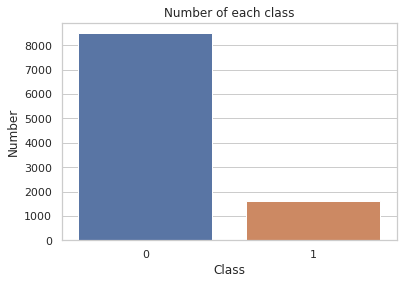

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=chart)
ax.set_title('Number of each class')
ax.set_ylabel('Number')
ax.set_xlabel('Class')

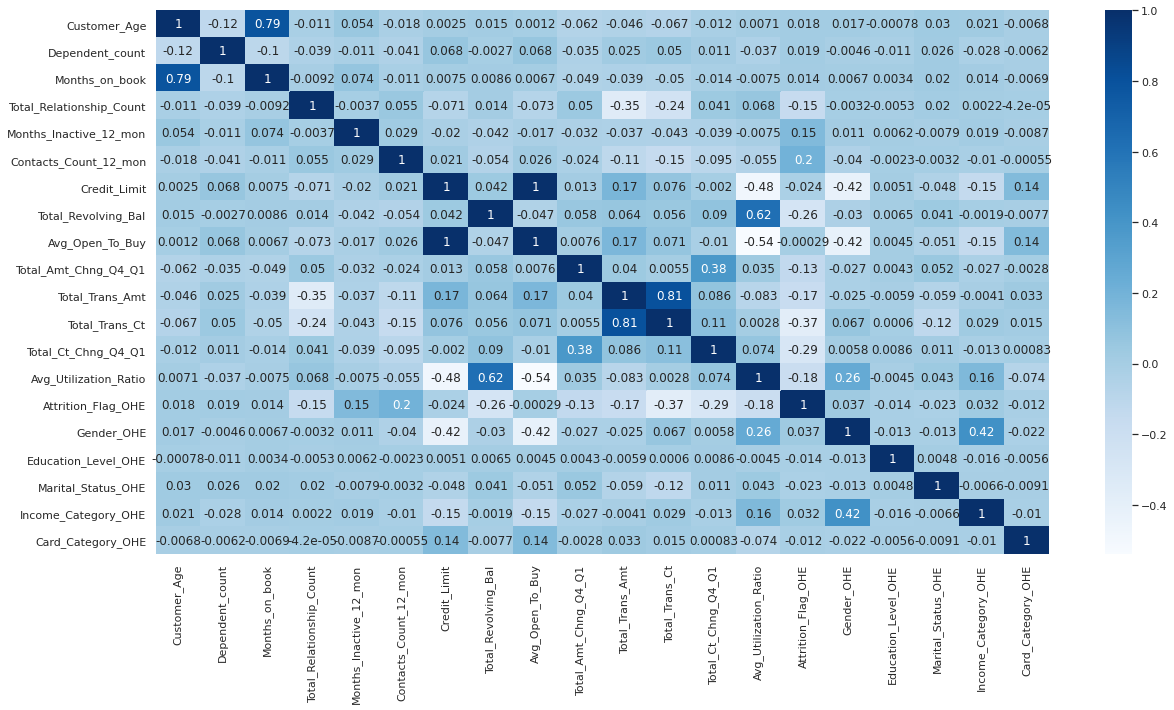

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True,cmap="Blues")

Look at the Attrition_Flag_OHE (independent variable/class), it's pretty low corelation value. My hypothesis is it's because the dataset is imbalanced and uncscaled

To overcome this problem, we have two solutions. Undersampling or oversampling and scalling the features value. Let's compare them.

In [ ]:
dataset = df[[i for i in df.columns if i not in col_obj]]

In [ ]:
dataset.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_OHE,Gender_OHE,Education_Level_OHE,Marital_Status_OHE,Income_Category_OHE,Card_Category_OHE
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,6,3,0,2
818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1,2,0,5,2
713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,2,3,3,2
769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1,6,1,5,2
709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,4,3,0,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64

Let's scale it using robust scaler. RobustScaler is less prone to outliers.

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rob_scaler = RobustScaler()
#scaling all the features except the one hot encoding features, because it doesnt need 
for i in range(14):
  col_name = dataset.iloc[:,i].name+'_Scaled'
  dataset[col_name] = rob_scaler.fit_transform(dataset[dataset.iloc[:,i].name].values.reshape(-1,1))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer_Age                     10127 non-null  int64  
 1   Dependent_count                  10127 non-null  int64  
 2   Months_on_book                   10127 non-null  int64  
 3   Total_Relationship_Count         10127 non-null  int64  
 4   Months_Inactive_12_mon           10127 non-null  int64  
 5   Contacts_Count_12_mon            10127 non-null  int64  
 6   Credit_Limit                     10127 non-null  float64
 7   Total_Revolving_Bal              10127 non-null  int64  
 8   Avg_Open_To_Buy                  10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1             10127 non-null  float64
 10  Total_Trans_Amt                  10127 non-null  int64  
 11  Total_Trans_Ct                   10127 non-null  int64  
 12  Total_

In [ ]:
dataset.drop(columns=[c for c in dataset.iloc[:,:14].columns],inplace=True)

In [ ]:
dataset.head()

,Attrition_Flag_OHE,Gender_OHE,Education_Level_OHE,Marital_Status_OHE,Income_Category_OHE,Card_Category_OHE,Customer_Age_Scaled,Dependent_count_Scaled,Months_on_book_Scaled,Total_Relationship_Count_Scaled,Months_Inactive_12_mon_Scaled,Contacts_Count_12_mon_Scaled,Credit_Limit_Scaled,Total_Revolving_Bal_Scaled,Avg_Open_To_Buy_Scaled,Total_Amt_Chng_Q4_Q1_Scaled,Total_Trans_Amt_Scaled,Total_Trans_Ct_Scaled,Total_Ct_Chng_Q4_Q1_Scaled,Avg_Utilization_Ratio_Scaled
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,0,0,6,3,0,2,-0.090909,0.5,0.333333,0.5,-1.0,1.0,0.956476,-0.350175,0.988927,2.627193,-1.065558,-0.694444,3.911017,-0.239583
818770008,0,1,2,0,5,2,0.272727,1.5,0.888889,1.0,-1.0,0.0,0.435477,-0.289123,0.459078,3.530702,-1.008702,-0.944444,12.762712,-0.147917
713982108,0,0,2,3,3,2,0.454545,0.5,0.000000,0.0,-1.0,-2.0,-0.132863,-0.895439,-0.006562,8.149123,-0.778186,-1.305556,6.911017,-0.366667
769911858,0,1,6,1,5,2,-0.545455,1.0,-0.222222,-0.5,2.0,-1.0,-0.145198,0.870877,-0.313785,2.934211,-1.055115,-1.305556,6.911017,1.216667
709106358,0,0,4,3,0,2,-0.545455,0.5,-1.666667,0.5,-1.0,-2.0,0.019618,-0.895439,0.145527,6.311404,-1.192419,-1.083333,7.618644,-0.366667


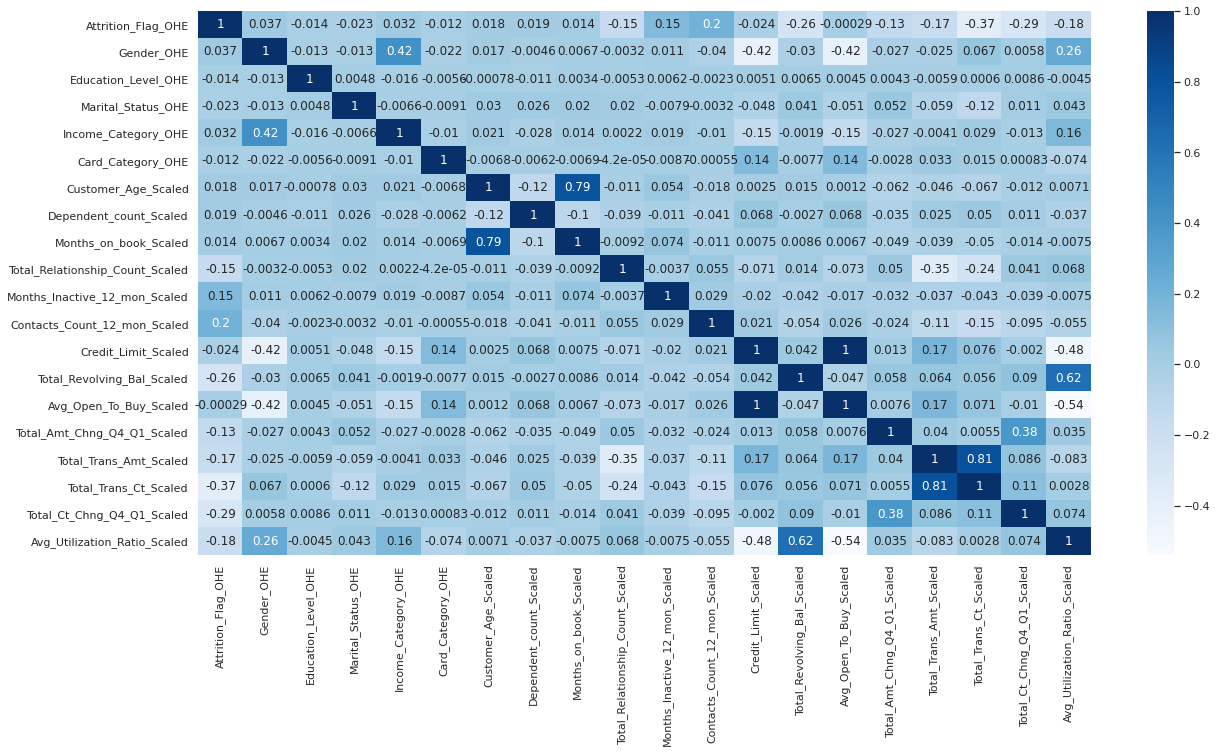

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(dataset.corr(), annot=True,cmap="Blues")

Random Undersampling

In [ ]:
dataset = dataset.sample(frac=1)
attrited = dataset.loc[dataset['Attrition_Flag_OHE']==1]
existing =  dataset.loc[dataset['Attrition_Flag_OHE']==0][:1627]
nd_dataset = pd.concat([attrited,existing])
new_df = nd_dataset.sample(frac=1, random_state=42)
new_df.head()

,Attrition_Flag_OHE,Gender_OHE,Education_Level_OHE,Marital_Status_OHE,Income_Category_OHE,Card_Category_OHE,Customer_Age_Scaled,Dependent_count_Scaled,Months_on_book_Scaled,Total_Relationship_Count_Scaled,Months_Inactive_12_mon_Scaled,Contacts_Count_12_mon_Scaled,Credit_Limit_Scaled,Total_Revolving_Bal_Scaled,Avg_Open_To_Buy_Scaled,Total_Amt_Chng_Q4_Q1_Scaled,Total_Trans_Amt_Scaled,Total_Trans_Ct_Scaled,Total_Ct_Chng_Q4_Q1_Scaled,Avg_Utilization_Ratio_Scaled
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
710303208,0,1,6,0,5,2,0.545455,-0.5,0.444444,-1.0,-1.0,-1.0,-0.050514,0.870877,-0.219345,0.078947,4.376716,1.500000,0.677966,0.906250
708793008,1,0,3,2,3,2,0.000000,0.5,-0.111111,0.5,1.0,1.0,0.634361,-0.895439,0.758685,-0.710526,-0.654419,-0.750000,-0.936441,-0.366667
778465533,0,1,5,3,5,2,0.727273,-1.0,0.444444,-0.5,-1.0,0.0,-0.341968,-0.895439,-0.215127,0.061404,-0.778960,-0.444444,-0.665254,-0.366667
718148358,1,1,6,3,5,2,0.363636,0.5,0.000000,-1.0,1.0,1.0,-0.349721,-0.895439,-0.222860,0.017544,-0.561594,-0.722222,-0.529661,-0.366667
719118708,1,1,0,0,5,2,0.272727,0.5,0.111111,-1.0,0.0,0.0,0.153421,-0.895439,0.278985,0.991228,2.051054,0.361111,0.669492,-0.366667


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254 entries, 710303208 to 714389058
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Attrition_Flag_OHE               3254 non-null   int64  
 1   Gender_OHE                       3254 non-null   int64  
 2   Education_Level_OHE              3254 non-null   int64  
 3   Marital_Status_OHE               3254 non-null   int64  
 4   Income_Category_OHE              3254 non-null   int64  
 5   Card_Category_OHE                3254 non-null   int64  
 6   Customer_Age_Scaled              3254 non-null   float64
 7   Dependent_count_Scaled           3254 non-null   float64
 8   Months_on_book_Scaled            3254 non-null   float64
 9   Total_Relationship_Count_Scaled  3254 non-null   float64
 10  Months_Inactive_12_mon_Scaled    3254 non-null   float64
 11  Contacts_Count_12_mon_Scaled     3254 non-null   float64
 12  Credit_

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Attrition_Flag_OHE, dtype: float64


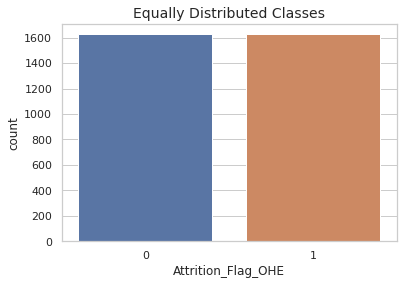

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Attrition_Flag_OHE'].value_counts()/len(new_df))

sns.countplot('Attrition_Flag_OHE', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

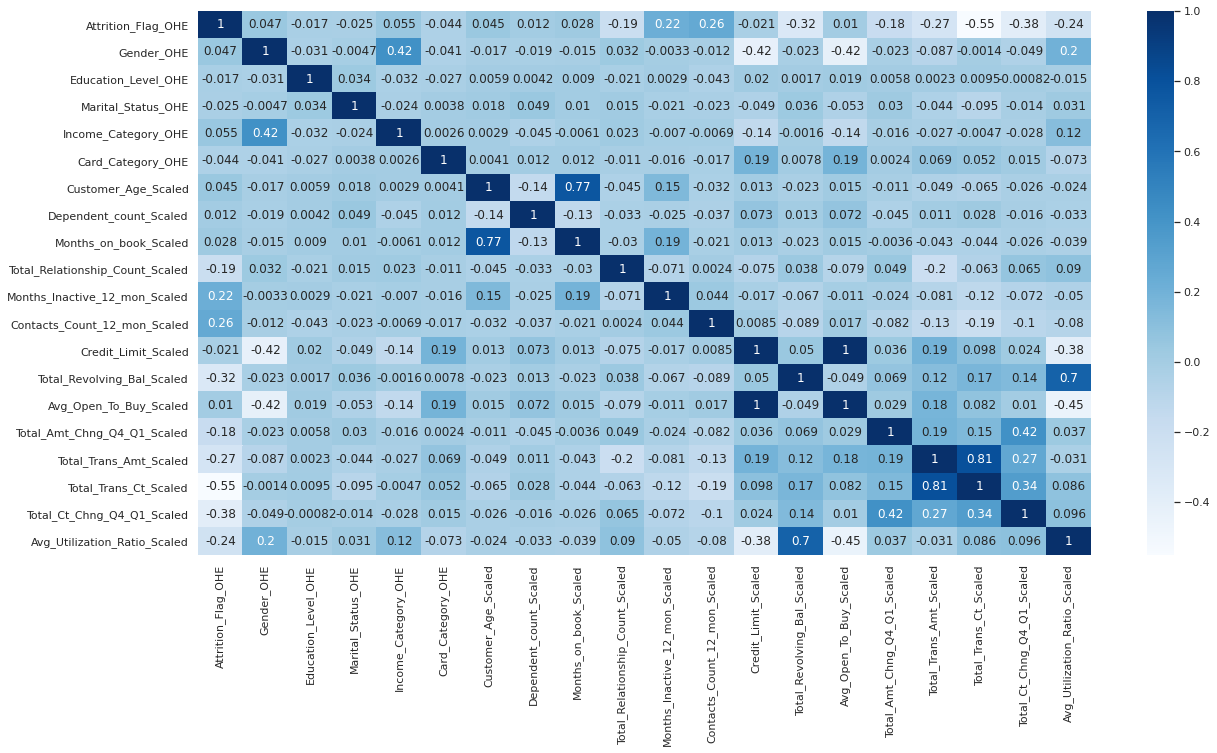

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(new_df.corr(), annot=True,cmap="Blues")

In [ ]:
new_df.corr().nsmallest(3,'Attrition_Flag_OHE')

,Attrition_Flag_OHE,Gender_OHE,Education_Level_OHE,Marital_Status_OHE,Income_Category_OHE,Card_Category_OHE,Customer_Age_Scaled,Dependent_count_Scaled,Months_on_book_Scaled,Total_Relationship_Count_Scaled,Months_Inactive_12_mon_Scaled,Contacts_Count_12_mon_Scaled,Credit_Limit_Scaled,Total_Revolving_Bal_Scaled,Avg_Open_To_Buy_Scaled,Total_Amt_Chng_Q4_Q1_Scaled,Total_Trans_Amt_Scaled,Total_Trans_Ct_Scaled,Total_Ct_Chng_Q4_Q1_Scaled,Avg_Utilization_Ratio_Scaled
Total_Trans_Ct_Scaled,-0.549228,-0.001430,0.009536,-0.094536,-0.004746,0.052004,-0.064956,0.027652,-0.044340,-0.062983,-0.122851,-0.192261,0.098370,0.166367,0.081991,0.149842,0.808651,1.000000,0.343173,0.086320
Total_Ct_Chng_Q4_Q1_Scaled,-0.380408,-0.049306,-0.000817,-0.014395,-0.027840,0.014994,-0.026228,-0.015825,-0.025712,0.064830,-0.072111,-0.101677,0.023886,0.141274,0.009975,0.419427,0.271600,0.343173,1.000000,0.095801
Total_Revolving_Bal_Scaled,-0.323281,-0.022712,0.001659,0.036117,-0.001603,0.007787,-0.022869,0.013411,-0.023078,0.038142,-0.066521,-0.089176,0.049651,1.000000,-0.048822,0.068532,0.118969,0.166367,0.141274,0.699046


In [ ]:
new_df.corr().nlargest(3,'Attrition_Flag_OHE')

,Attrition_Flag_OHE,Gender_OHE,Education_Level_OHE,Marital_Status_OHE,Income_Category_OHE,Card_Category_OHE,Customer_Age_Scaled,Dependent_count_Scaled,Months_on_book_Scaled,Total_Relationship_Count_Scaled,Months_Inactive_12_mon_Scaled,Contacts_Count_12_mon_Scaled,Credit_Limit_Scaled,Total_Revolving_Bal_Scaled,Avg_Open_To_Buy_Scaled,Total_Amt_Chng_Q4_Q1_Scaled,Total_Trans_Amt_Scaled,Total_Trans_Ct_Scaled,Total_Ct_Chng_Q4_Q1_Scaled,Avg_Utilization_Ratio_Scaled
Attrition_Flag_OHE,1.000000,0.046931,-0.016877,-0.025080,0.055206,-0.044035,0.045089,0.011557,0.028327,-0.193048,0.223192,0.258246,-0.021363,-0.323281,0.010472,-0.179809,-0.273685,-0.549228,-0.380408,-0.242437
Contacts_Count_12_mon_Scaled,0.258246,-0.012311,-0.042656,-0.022747,-0.006949,-0.016803,-0.032326,-0.037074,-0.020515,0.002389,0.043600,1.000000,0.008470,-0.089176,0.017252,-0.081968,-0.134791,-0.192261,-0.101677,-0.080100
Months_Inactive_12_mon_Scaled,0.223192,-0.003322,0.002916,-0.020907,-0.006999,-0.015826,0.150978,-0.025264,0.194937,-0.071426,1.000000,0.043600,-0.017082,-0.066521,-0.010532,-0.024077,-0.081307,-0.122851,-0.072111,-0.050241


Look at the Attrition_Flag_OHE correlation score gained

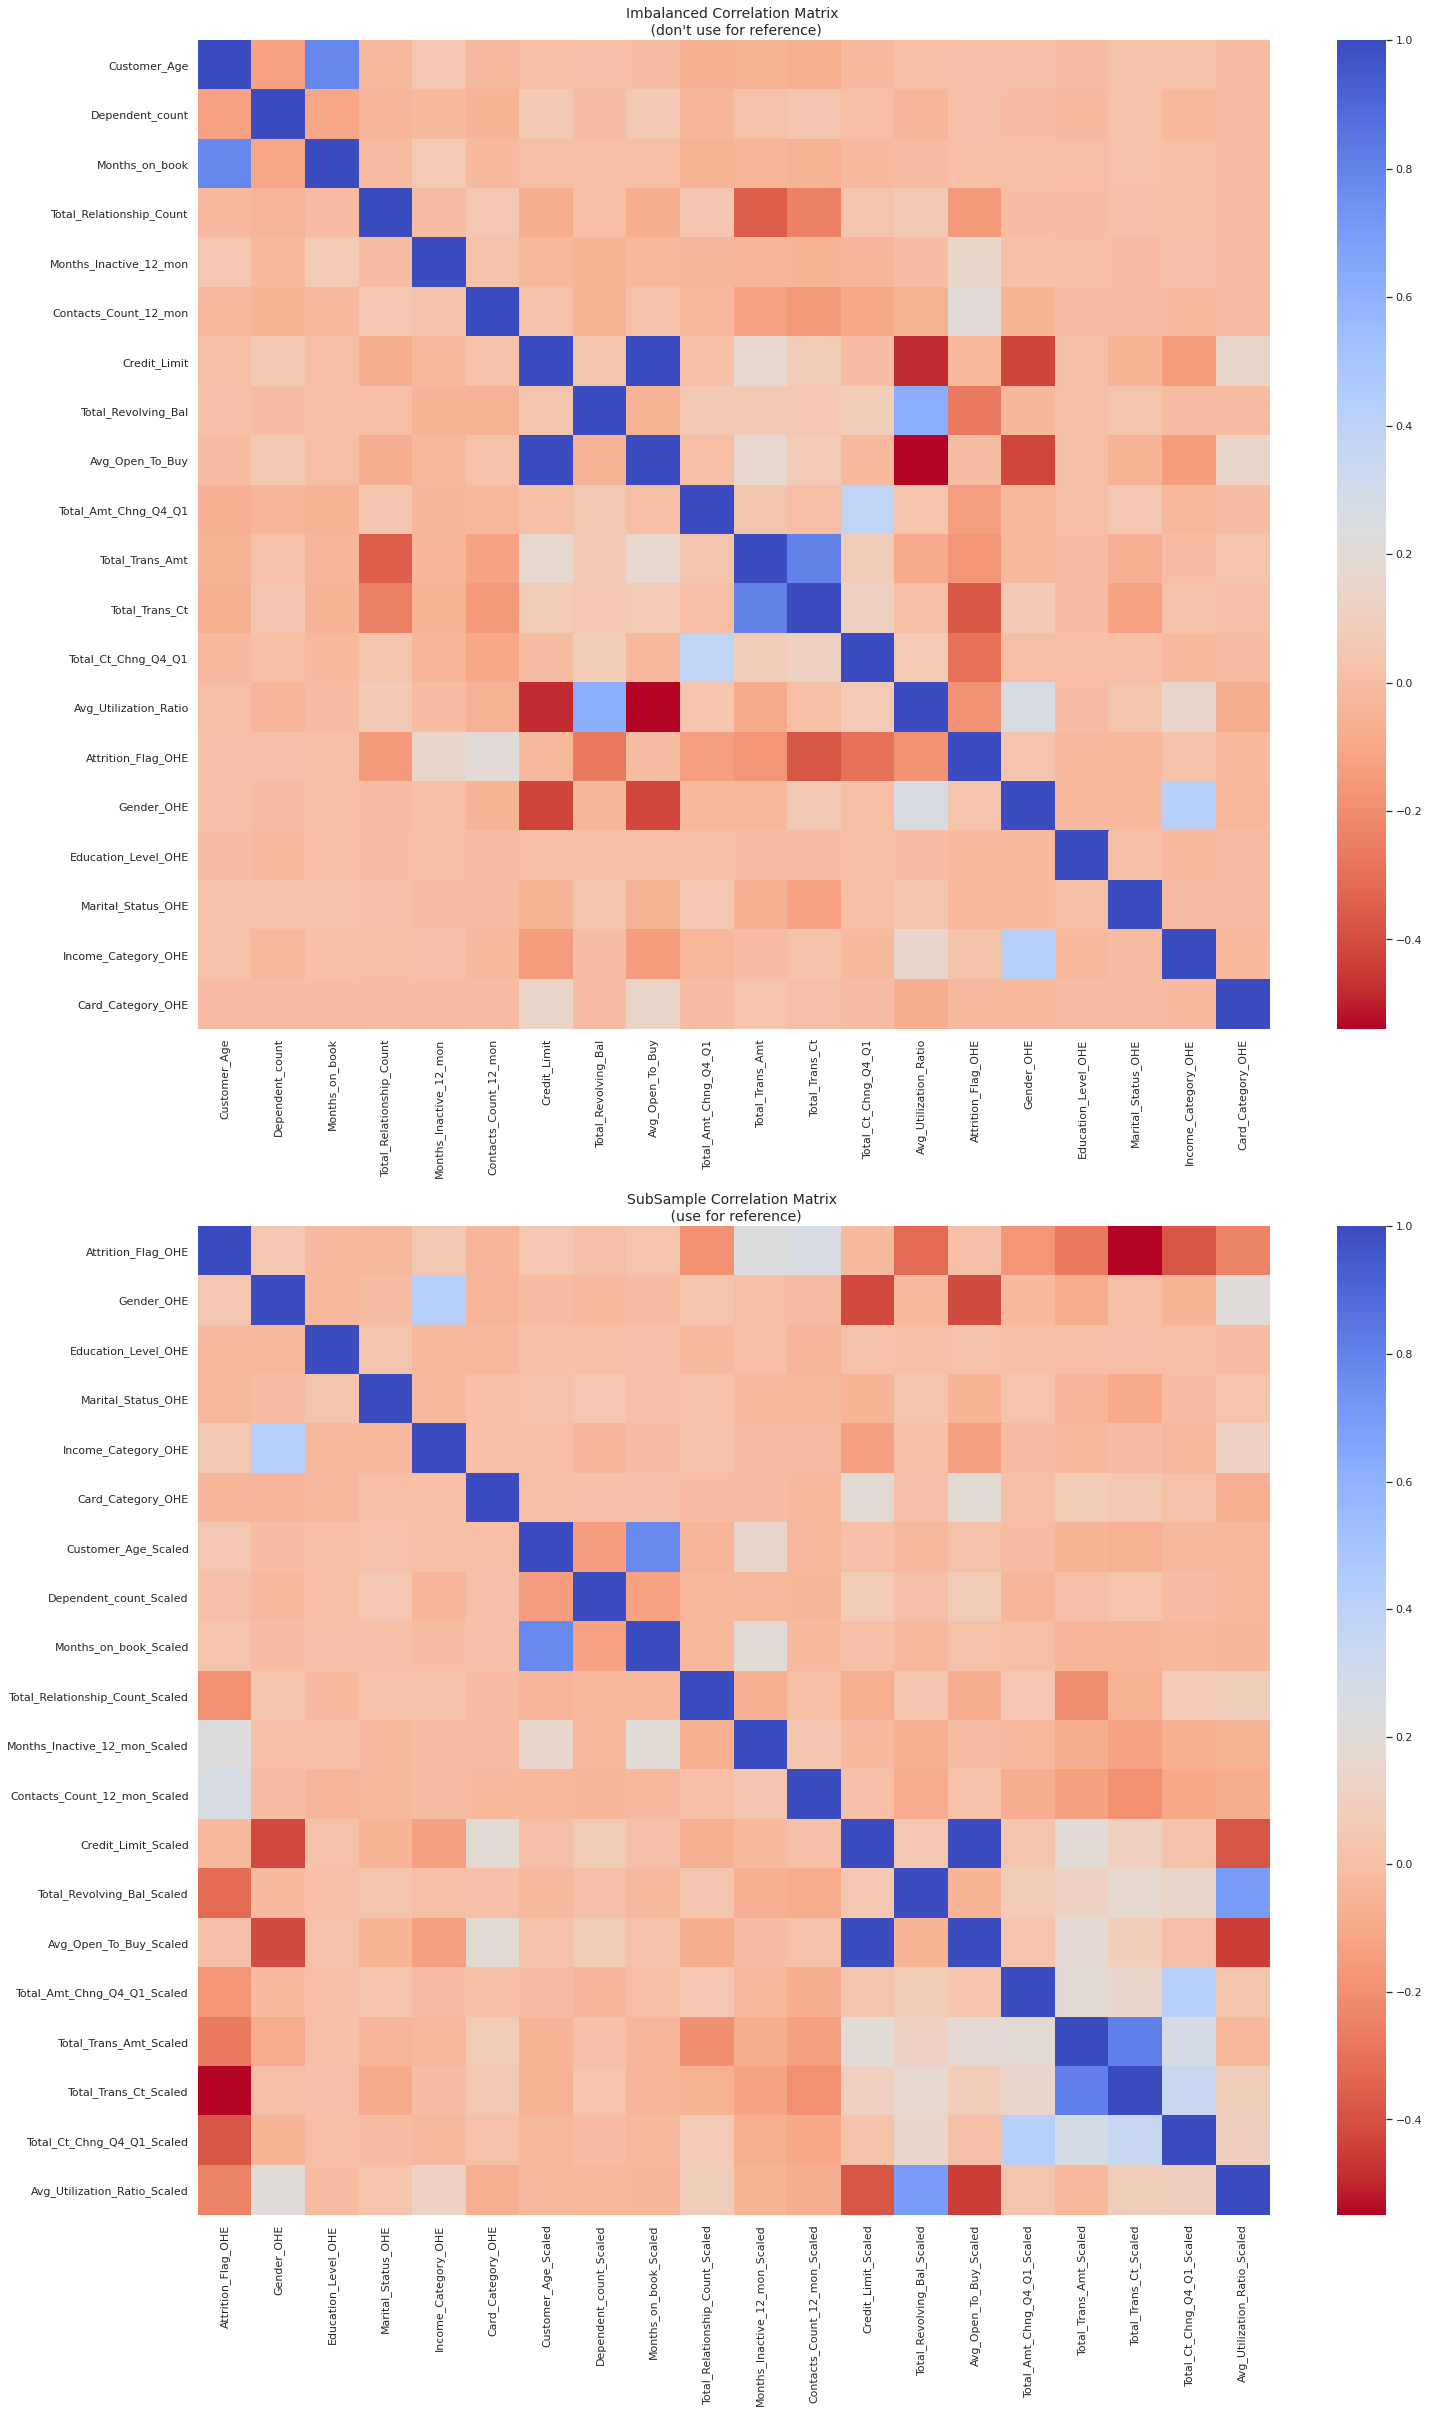

In [ ]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,40))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

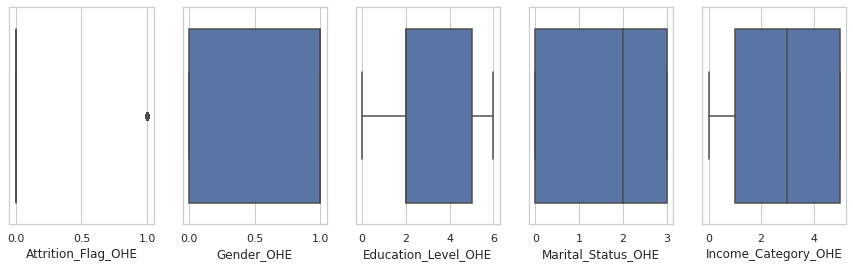

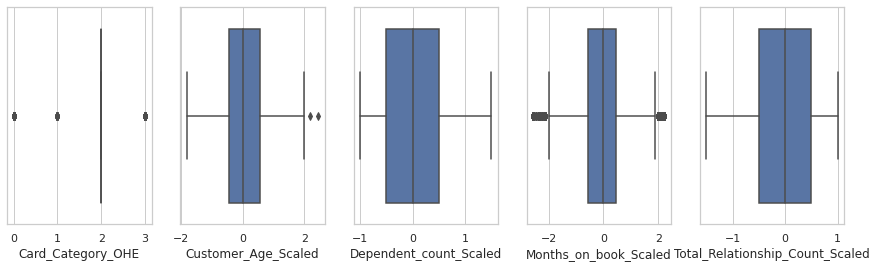

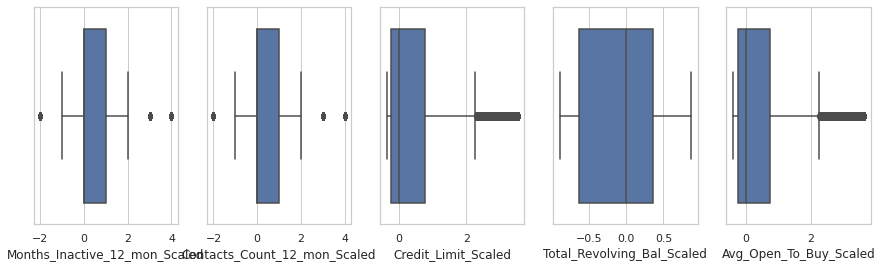

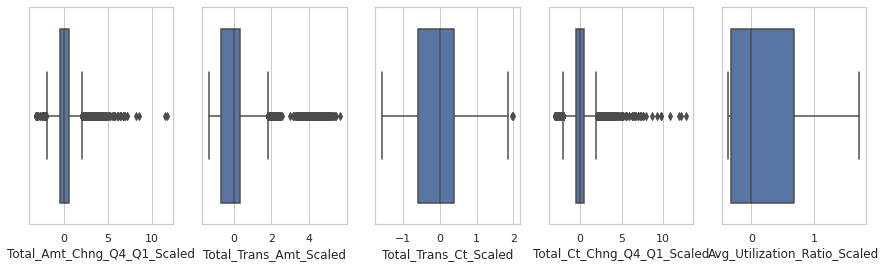

In [ ]:
for col in range(len(dataset.columns)):
  if col%5 == 0:
    f, axes = plt.subplots(ncols=5, figsize=(15,4))
    sns.boxplot(x=dataset.iloc[:,col].name,data=dataset, ax=axes[0])
    sns.boxplot(x=dataset.iloc[:,col+1].name,data=dataset, ax=axes[1])
    sns.boxplot(x=dataset.iloc[:,col+2].name,data=dataset, ax=axes[2])
    sns.boxplot(x=dataset.iloc[:,col+3].name,data=dataset, ax=axes[3])
    sns.boxplot(x=dataset.iloc[:,col+4].name,data=dataset, ax=axes[4])
    plt.show()

There are so many outliers here. Let's remove in Total_Trans_ct & Total_Ct_Chng_Q4_Q1 (two biggest corellation score to independent variable)

In [ ]:
def removal(dt):
  q1 = np.quantile(dt,0.25)
  q3 = np.quantile(dt,0.75)
  iqr = 1.5*(q3-q1)
  low_out, up_out = q1-iqr,q3+iqr
  return low_out,up_out

In [ ]:
lw,up = removal(dataset['Total_Trans_Ct_Scaled'])
len(dataset['Total_Trans_Ct_Scaled'].loc[(dataset['Total_Trans_Ct_Scaled']<lw) | (dataset['Total_Trans_Ct_Scaled']>up)])

2

In [ ]:
lw1,up1 = removal(dataset['Total_Ct_Chng_Q4_Q1_Scaled'])
len(dataset['Total_Ct_Chng_Q4_Q1_Scaled'].loc[(dataset['Total_Ct_Chng_Q4_Q1_Scaled']<lw1) | (dataset['Total_Ct_Chng_Q4_Q1_Scaled']>up1)])

396

In [ ]:
dataset['Total_Trans_Ct_Scaled'].loc[(dataset['Total_Trans_Ct_Scaled']<lw) | (dataset['Total_Trans_Ct_Scaled']>up)].index

Int64Index([784868958, 708163758], dtype='int64', name='CLIENTNUM')

In [ ]:
dataset['Total_Ct_Chng_Q4_Q1_Scaled'].loc[(dataset['Total_Ct_Chng_Q4_Q1_Scaled']<lw1) | (dataset['Total_Ct_Chng_Q4_Q1_Scaled']>up1)].index[0:5]

Int64Index([721091583, 771197433, 768563658, 709794333, 711569433], dtype='int64', name='CLIENTNUM')

We got the outlier, let's remove it

In [ ]:
dataset = dataset.drop(index=dataset['Total_Ct_Chng_Q4_Q1_Scaled'].loc[(dataset['Total_Ct_Chng_Q4_Q1_Scaled']<lw) | (dataset['Total_Ct_Chng_Q4_Q1_Scaled']>up)].index)
dataset = dataset.drop(index=dataset['Total_Trans_Ct_Scaled'].loc[(dataset['Total_Trans_Ct_Scaled']<lw1) | (dataset['Total_Trans_Ct_Scaled']>up1)].index)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9720 entries, 717940008 to 717626508
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Attrition_Flag_OHE               9720 non-null   int64  
 1   Gender_OHE                       9720 non-null   int64  
 2   Education_Level_OHE              9720 non-null   int64  
 3   Marital_Status_OHE               9720 non-null   int64  
 4   Income_Category_OHE              9720 non-null   int64  
 5   Card_Category_OHE                9720 non-null   int64  
 6   Customer_Age_Scaled              9720 non-null   float64
 7   Dependent_count_Scaled           9720 non-null   float64
 8   Months_on_book_Scaled            9720 non-null   float64
 9   Total_Relationship_Count_Scaled  9720 non-null   float64
 10  Months_Inactive_12_mon_Scaled    9720 non-null   float64
 11  Contacts_Count_12_mon_Scaled     9720 non-null   float64
 12  Credit_

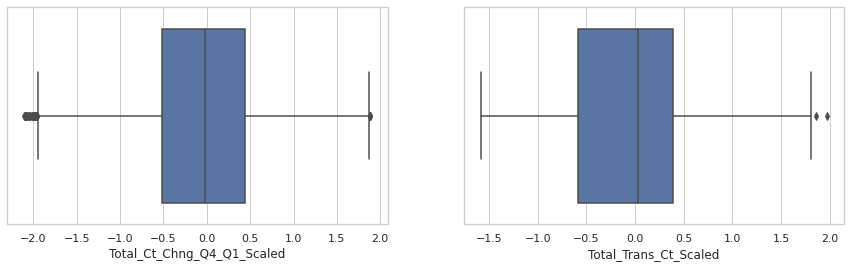

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(15,4))
sns.boxplot(x='Total_Ct_Chng_Q4_Q1_Scaled',data=dataset, ax=axes[0])
sns.boxplot(x='Total_Trans_Ct_Scaled',data=dataset, ax=axes[1])
plt.show()

Now, there's less outlier than before. Let's see how good the classifiers with imbalanced dataset.

In [ ]:
dataset.head()

,Attrition_Flag_OHE,Gender_OHE,Education_Level_OHE,Marital_Status_OHE,Income_Category_OHE,Card_Category_OHE,Customer_Age_Scaled,Dependent_count_Scaled,Months_on_book_Scaled,Total_Relationship_Count_Scaled,Months_Inactive_12_mon_Scaled,Contacts_Count_12_mon_Scaled,Credit_Limit_Scaled,Total_Revolving_Bal_Scaled,Avg_Open_To_Buy_Scaled,Total_Amt_Chng_Q4_Q1_Scaled,Total_Trans_Amt_Scaled,Total_Trans_Ct_Scaled,Total_Ct_Chng_Q4_Q1_Scaled,Avg_Utilization_Ratio_Scaled
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
717940008,0,1,0,2,1,2,1.000000,0.0,0.000000,0.5,0.0,0.0,-0.152482,0.428772,-0.247232,1.188596,-0.259524,0.000000,0.258475,0.841667
814752558,0,0,4,3,1,2,0.363636,-0.5,1.000000,0.5,1.0,1.0,-0.281703,-0.079298,-0.291288,0.495614,-0.536067,-0.138889,-0.474576,0.760417
711607833,0,0,6,3,0,2,-0.272727,1.5,0.000000,0.5,0.0,-1.0,-0.204288,0.777544,-0.357139,0.539474,0.377490,0.833333,0.262712,1.400000
713804058,0,1,5,3,5,2,-0.090909,1.0,0.000000,0.5,0.0,1.0,-0.042526,0.647719,-0.174117,0.754386,0.289306,0.388889,0.771186,0.727083
779920533,0,1,6,3,5,2,0.727273,-0.5,0.555556,-0.5,1.0,0.0,-0.089868,0.870877,-0.258597,-0.385965,4.370528,0.805556,-0.076271,1.018750


In [ ]:
X = dataset.iloc[:,1:]
X.head()

,Gender_OHE,Education_Level_OHE,Marital_Status_OHE,Income_Category_OHE,Card_Category_OHE,Customer_Age_Scaled,Dependent_count_Scaled,Months_on_book_Scaled,Total_Relationship_Count_Scaled,Months_Inactive_12_mon_Scaled,Contacts_Count_12_mon_Scaled,Credit_Limit_Scaled,Total_Revolving_Bal_Scaled,Avg_Open_To_Buy_Scaled,Total_Amt_Chng_Q4_Q1_Scaled,Total_Trans_Amt_Scaled,Total_Trans_Ct_Scaled,Total_Ct_Chng_Q4_Q1_Scaled,Avg_Utilization_Ratio_Scaled
CLIENTNUM,,,,,,,,,,,,,,,,,,,
717940008,1,0,2,1,2,1.000000,0.0,0.000000,0.5,0.0,0.0,-0.152482,0.428772,-0.247232,1.188596,-0.259524,0.000000,0.258475,0.841667
814752558,0,4,3,1,2,0.363636,-0.5,1.000000,0.5,1.0,1.0,-0.281703,-0.079298,-0.291288,0.495614,-0.536067,-0.138889,-0.474576,0.760417
711607833,0,6,3,0,2,-0.272727,1.5,0.000000,0.5,0.0,-1.0,-0.204288,0.777544,-0.357139,0.539474,0.377490,0.833333,0.262712,1.400000
713804058,1,5,3,5,2,-0.090909,1.0,0.000000,0.5,0.0,1.0,-0.042526,0.647719,-0.174117,0.754386,0.289306,0.388889,0.771186,0.727083
779920533,1,6,3,5,2,0.727273,-0.5,0.555556,-0.5,1.0,0.0,-0.089868,0.870877,-0.258597,-0.385965,4.370528,0.805556,-0.076271,1.018750


In [ ]:
Y = dataset.iloc[:,0]
Y.head()

CLIENTNUM
717940008    0
814752558    0
711607833    0
713804058    0
779920533    0
Name: Attrition_Flag_OHE, dtype: int64

In [ ]:
X.reset_index(level=0, inplace=True)

In [ ]:
X.drop(columns='CLIENTNUM',inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender_OHE                       9720 non-null   int64  
 1   Education_Level_OHE              9720 non-null   int64  
 2   Marital_Status_OHE               9720 non-null   int64  
 3   Income_Category_OHE              9720 non-null   int64  
 4   Card_Category_OHE                9720 non-null   int64  
 5   Customer_Age_Scaled              9720 non-null   float64
 6   Dependent_count_Scaled           9720 non-null   float64
 7   Months_on_book_Scaled            9720 non-null   float64
 8   Total_Relationship_Count_Scaled  9720 non-null   float64
 9   Months_Inactive_12_mon_Scaled    9720 non-null   float64
 10  Contacts_Count_12_mon_Scaled     9720 non-null   float64
 11  Credit_Limit_Scaled              9720 non-null   float64
 12  Total_Revolving_Bal_

In [ ]:
Y = Y.reset_index(drop=True)

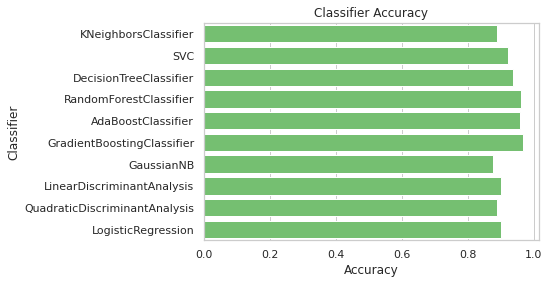

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, Y):
  X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
  y_train, y_test = Y[train_index], Y[test_index]
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)


for clf in classifiers:
    name = clf.__class__.__name__
    #clf.fit(X_train, y_train)
    #train_predictions = clf.predict(X_test)
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    accu = cross_val_score(clf, X_train, y_train, cv=kfold)
    acc = np.mean(accu)
    #acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")

In [ ]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.887860
0,SVC,0.920897
0,DecisionTreeClassifier,0.935527
0,RandomForestClassifier,0.961591
0,AdaBoostClassifier,0.958047
0,GradientBoostingClassifier,0.965935
0,GaussianNB,0.876658
0,LinearDiscriminantAnalysis,0.900434
0,QuadraticDiscriminantAnalysis,0.887859
0,LogisticRegression,0.901120


Random forest get an outstanding score. BUT. We haven't do the validation yet! From now, we use the Random Forest as classifier. We compare with ANN.

And now, we have 19 features. We can optimize the number of features using GA, chi square, and so on. Let's do it.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, test_size=0.30, 
                                                    random_state=101)

logmodel = RandomForestClassifier()

In [ ]:
#defining various steps required for the genetic algorithm
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        #print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
chromo,score=generations(size=100,n_feat=19,n_parents=100,mutation_rate=0.1,
                     n_gen=30,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
print(X_train.iloc[:,chromo[-1]].columns)
print(np.mean(score))

Index(['Gender_OHE', 'Education_Level_OHE', 'Income_Category_OHE',
       'Card_Category_OHE', 'Customer_Age_Scaled', 'Months_on_book_Scaled',
       'Months_Inactive_12_mon_Scaled', 'Contacts_Count_12_mon_Scaled',
       'Total_Revolving_Bal_Scaled', 'Avg_Open_To_Buy_Scaled',
       'Total_Amt_Chng_Q4_Q1_Scaled', 'Total_Trans_Amt_Scaled',
       'Total_Trans_Ct_Scaled', 'Total_Ct_Chng_Q4_Q1_Scaled'],
      dtype='object')
0.9663580246913582


Look at the Accuracy with GA Optimizer, the accuracy gained 0.5%-1% and less features. It will speed up the training time



In [ ]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
for train_index, remain_index in sss.split(X, Y):
  X_train, X_remain = X.iloc[train_index,chromo[-1]], X.iloc[remain_index,chromo[-1]]
  y_train, y_remain = Y[train_index], Y[remain_index]

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=50)
for val_index, test_index in sss.split(X_remain, y_remain):
  X_val, X_test = X.iloc[val_index,chromo[-1]], X.iloc[test_index,chromo[-1]]
  y_val, y_test = Y[val_index], Y[test_index]

In [ ]:
print(X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape,X_remain.shape,y_remain.shape)

(6804, 14) (6804,) (1458, 14) (1458,) (1458, 14) (1458,) (2916, 14) (2916,)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'bootstrap': [False],
 'max_depth': [10, 1000],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 5],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [2000,400]
 }

gsRF = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 10, n_jobs = -1, verbose = 2)
gsRF.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 39.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
gsRF.best_params_

{'bootstrap': False,
 'max_depth': 1000,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [ ]:
gsRF.best_score_

0.9601710287639286

In [ ]:
rf_clf = gsRF.best_estimator_

Those score is still overfit because imbalanced dataset. Let's discover why. We will use NearMiss for undersampling the dataset

In [ ]:
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
undersample_X = X.iloc[:,chromo[-1]]
undersample_y = Y

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way


for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), rf_clf) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(X_train[test], y_train[test]))
    undersample_precision.append(precision_score(y_train[test], undersample_prediction))
    undersample_recall.append(recall_score(y_train[test], undersample_prediction))
    undersample_f1.append(f1_score(y_train[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(y_train[test], undersample_prediction))

Train: [8027 1776 4363 ... 2474 6338 1130] Test: [3394 9247 9604 ... 6995 3610 9013]
Train: [6624 5623 4117 ... 6181 7593 1235] Test: [6986 2761 7678 ...  592 9483  315]
Train: [5743 8613 7326 ... 1720 7111 3845] Test: [9285 3701 6781 ... 7318 5836 6856]
Train: [7546 2946 3345 ... 8106 2869 5055] Test: [8086 3695 5438 ... 4426 4692 8718]
Train: [3847 3327 6192 ... 9012 6991 6996] Test: [5739 7655 6481 ... 7931 7815 3997]
Train: [7516 9229  567 ... 9627 2330 8621] Test: [5911 5370 7144 ... 7373 1382 8316]
Train: [3632  466 7097 ... 1626 8908 1689] Test: [8960 3663 9306 ... 5390 4454 9278]
Train: [3445 5589 3875 ... 8211  931 2477] Test: [1062 9215 4780 ... 7013 6276 4301]
Train: [7156 5996 7274 ... 3849 5833 6142] Test: [6783 3899 1006 ... 1852  558 6920]
Train: [  88 1567 1484 ... 2239 1523 5403] Test: [7526 8230 5061 ... 1808  897 6251]
NearMiss Label Distribution: Counter({0: 1553, 1: 1553})


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=10)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = rf_clf.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Accuracy Score: 0.74
Precision Score: 0.38
Recall Score: 0.96
F1 Score: 0.54
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.78
Precision Score: 0.16
Recall Score: 0.37
F1 Score: 0.23
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC Classifier: ', roc_auc_score(y_train, rf_pred))

ROC Classifier:  0.9051468376808045


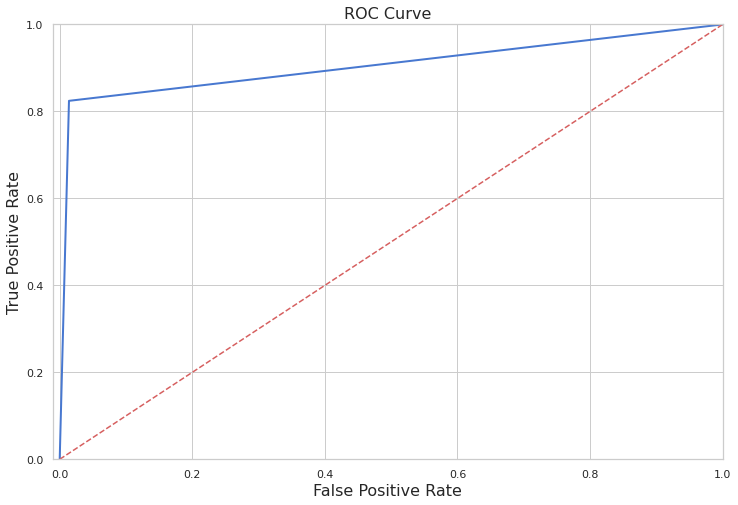

In [ ]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_train, rf_pred)

def rf_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
rf_roc_curve(log_fpr, log_tpr)
plt.show()

In [ ]:
undersample_y_score = rf_clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(y_test, undersample_y_score[:,1])

Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.83')

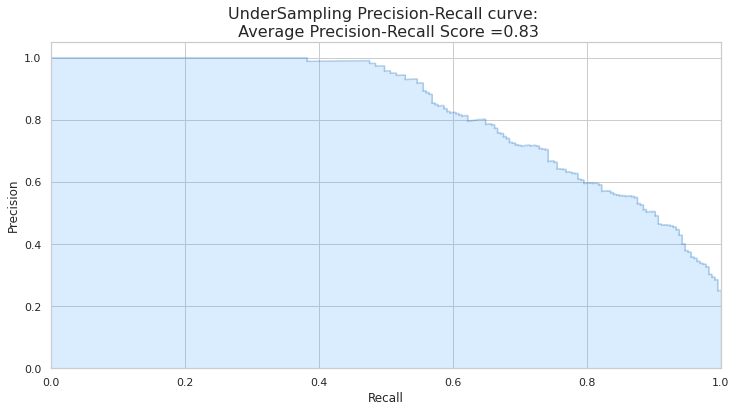

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall,_= precision_recall_curve(y_test, undersample_y_score[:,1])

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = RandomForestClassifier()


rand_log_reg = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

for train, test in sss.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_train[train], y_train[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 6804 | Length of y (train): 6804
Length of X (test): 1458 | Length of y (test): 1458
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9433862433862433
precision: 0.8152653356659018
recall: 0.8370419645758856
f1: 0.8255629851702885
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['Exist', 'Churn']
smote_prediction = best_est.predict(X_test)
print(classification_report(y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

       Exist       0.98      0.96      0.97      1233
       Churn       0.82      0.87      0.84       225

    accuracy                           0.95      1458
   macro avg       0.90      0.92      0.91      1458
weighted avg       0.95      0.95      0.95      1458



In [ ]:
y_score = best_est.predict_proba(X_test)

In [ ]:
average_precision = average_precision_score(y_test, y_score[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.94


In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)

In [ ]:
import time
t0 = time.time()
log_reg_sm = gsRF.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :11.87455415725708 sec


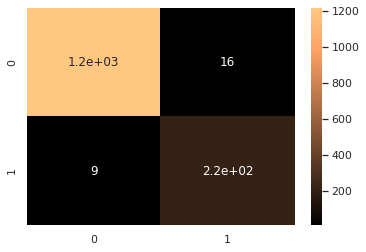

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_reg_sm.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)


sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.copper)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = log_reg_sm.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

y_pred_sm = best_est.predict(X_test)
oversample_score = accuracy_score(y_test, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.982853
1,Oversampling (SMOTE),0.949931


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.94')

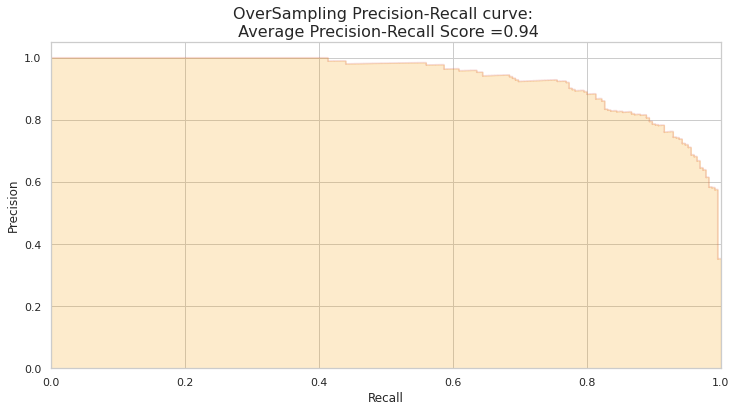

In [ ]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, y_score[:,1])

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [ ]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

tf.keras.backend.clear_session()


n_inputs = Xsm_train.shape[1]

def build_model():
    model = tf.keras.models.Sequential([
                                        tf.keras.layers.Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
                                        tf.keras.layers.Dense(8, activation='relu'),
                                        tf.keras.layers.Dense(4, activation='relu'),
                                        tf.keras.layers.Dense(2, activation='softmax')])
    model.compile(loss='sparse_categorical_crossentropy', 
        optimizer='adam', metrics=['accuracy'])
    return model

model = build_model()

model.summary()

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val))

keras_clf = KerasClassifier(build_model, epochs=20, batch_size=32)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(keras_clf, X_train, y_train, cv=kfold)
print(accuracies)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
213/213 [==============================] - 1s 3ms/step - loss: 0.5777 - accuracy: 0.6991 - val_loss: 0.3788 - val_accuracy: 0.8560
Epoch 2/20
213/213 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8463 - val_loss: 0.

In [ ]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1205   28]
 [  96  129]]
Confusion matrix, without normalization
[[1233    0]
 [   0  225]]


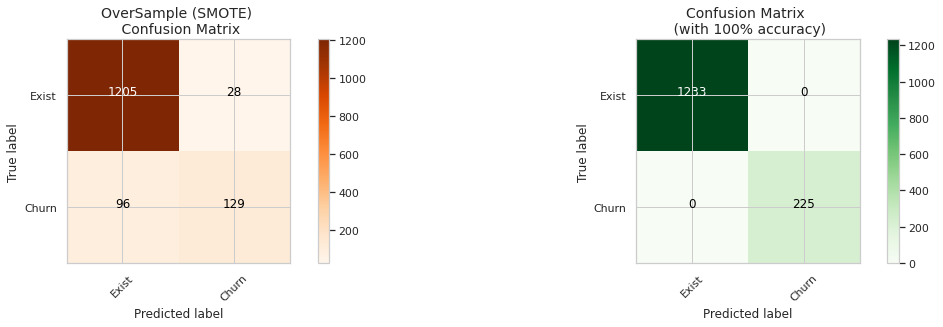

In [ ]:
oversample_predictions = model.predict_classes(X_test, batch_size=200, verbose=0)
oversample_smote = confusion_matrix(y_test, oversample_predictions)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['Exist', 'Churn']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)